# Predict Bitcoin price
https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima/notebook

https://www.kaggle.com/smitad/bitcoin-trading-strategy-simulation

In [75]:
library(tidyverse)

In [76]:
# read data
df <- read_csv(file = 'dataset/BTC_USD_2014-11-04_2021-12-06-CoinDesk.csv')
head(df)

Rows: 2590 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Currency
dbl  (4): Closing Price (USD), 24h Open (USD), 24h High (USD), 24h Low (USD)
date (1): Date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
BTC,2014-11-04,324.4679,323.8262,333.5395,323.1066
BTC,2014-11-05,328.6444,324.4242,330.6716,320.9029
BTC,2014-11-06,337.9214,328.6530,342.3842,328.5971
BTC,2014-11-07,348.9929,337.9214,352.5859,336.2368
BTC,2014-11-08,341.4598,348.9929,351.6519,340.1961
BTC,2014-11-09,344.7453,341.4598,346.4756,340.3575


2590 rows and 6 columns. There are 2590 data points 4 values (closing price, opening price, highest and lowest)

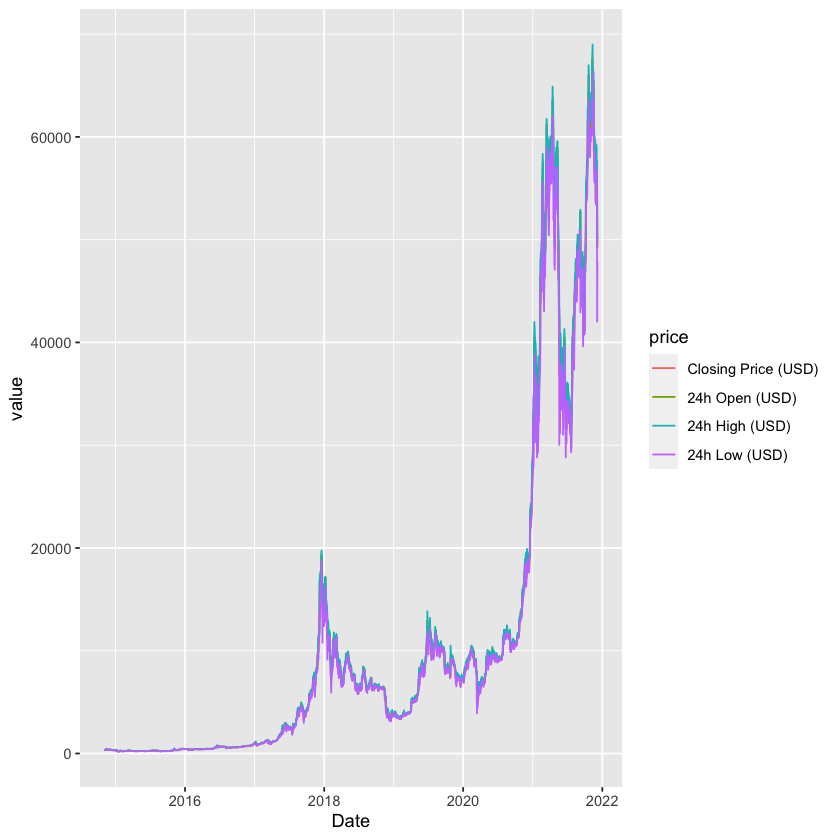

In [77]:
# transform table to long form
library(reshape2)
df <- subset(df, select = - Currency)
df2 <- melt(df, id.vars = "Date", variable.name = "price")

# plot price
library(ggplot2)
ggplot(df2) +
    geom_line(mapping = aes(x = Date, y = value, colour = price))

Try sampling monthly, quarterly and yearly to see if there is a pattern.

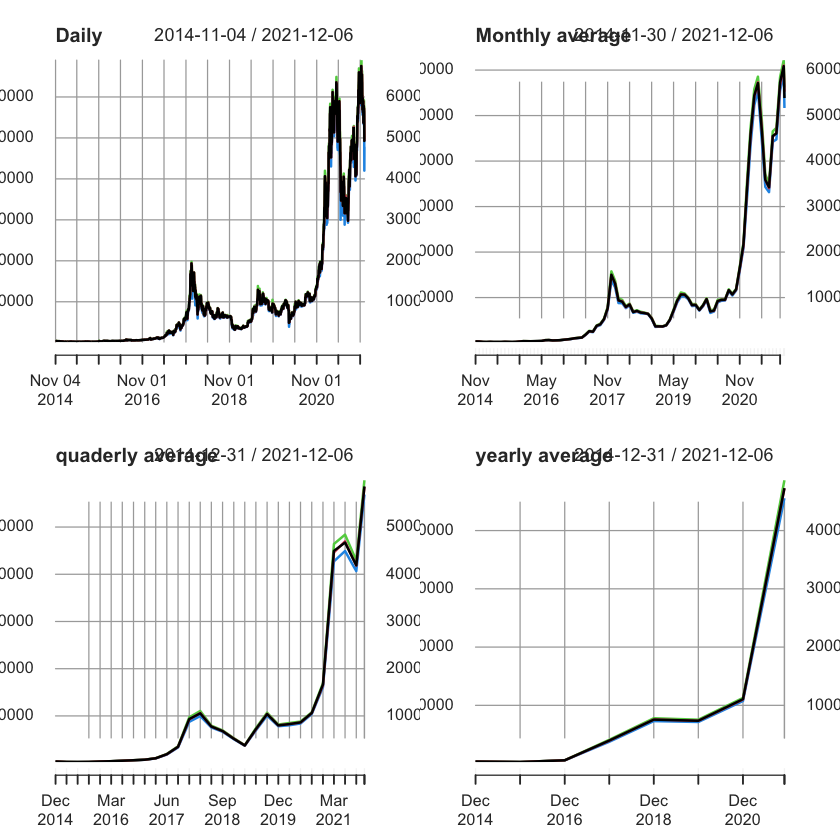

In [109]:
# use the xts library (time series)
library(xts)

par(mfrow=c(2, 2))

# turn the data to a xts object
df_xts <- xts(df[, -1], order.by = df$Date)
plot(df_xts, main = "Daily")

# monlthy
df_monthly <- apply.monthly(df_xts, mean)
plot(df_monthly, main = "Monthly average")

# quad yearly
df_quaderly <- apply.quarterly(df_xts, mean)
plot(df_quaderly, main = "quaderly average")

# yearly
df_yearly <- apply.yearly(df_xts, mean)
plot(df_yearly, main = "yearly average")

Daily data fluctuates too much, quaderly and yearly has too little movement. Therefore I will use the the monthly average data instead.

Variance fluctuates. Take a log to reduce varience 

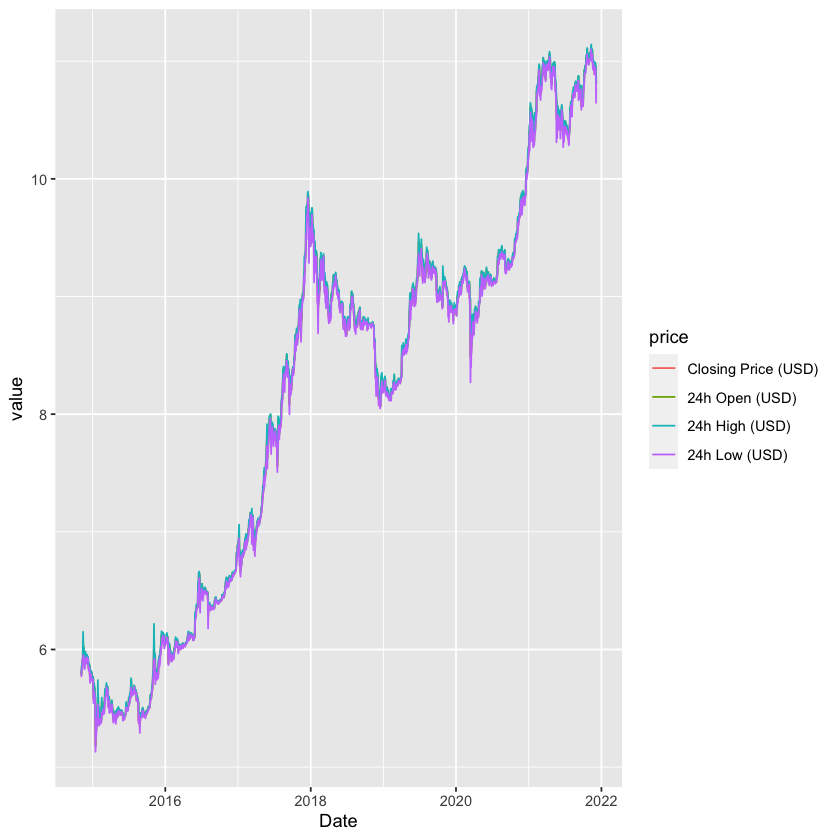

In [28]:
# log on price
df3 <- df %>% mutate(
    Currency = Currency,
    `Closing Price (USD)` = log(`Closing Price (USD)`),
    `24h Open (USD)` = log(`24h Open (USD)`),
    `24h High (USD)` = log(`24h High (USD)`),
    `24h Low (USD)` = log(`24h Low (USD)`)
)

# transform table to long form
library(reshape2)
df3 <- subset(df3, select = - Currency)
df3 <- melt(df3, id.vars = "Date", variable.name = "price")

# plot price
library(ggplot2)
ggplot(df3) +
    geom_line(mapping = aes(x = Date, y = value, colour = price))